# 준비

## 라이브러리 호출

In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
from termcolor import colored
from tqdm.notebook import tqdm

import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers, models, optimizers, losses

from sklearn.model_selection import train_test_split as tts

## 데이터

### 데이터 구조 확인

In [2]:
root_data = glob("D:/Dataset/dataset/KAMP/01. Dataset_OCR/*")
print("-"*10,"root data","-"*10)
for i in root_data:
    if not i[-3:]=="txt":
        temp = glob(i+"/*.jpg")
        print("---",i,colored("\t\timg_count\t:","red"),len(temp))
    else:
        print("---",i)

---------- root data ----------
--- D:/Dataset/dataset/KAMP/01. Dataset_OCR\0 		img_count	: 9191
--- D:/Dataset/dataset/KAMP/01. Dataset_OCR\1 		img_count	: 2519
--- D:/Dataset/dataset/KAMP/01. Dataset_OCR\2 		img_count	: 3294
--- D:/Dataset/dataset/KAMP/01. Dataset_OCR\3 		img_count	: 3505
--- D:/Dataset/dataset/KAMP/01. Dataset_OCR\4 		img_count	: 1436
--- D:/Dataset/dataset/KAMP/01. Dataset_OCR\5 		img_count	: 1504
--- D:/Dataset/dataset/KAMP/01. Dataset_OCR\6 		img_count	: 2837
--- D:/Dataset/dataset/KAMP/01. Dataset_OCR\7 		img_count	: 1002
--- D:/Dataset/dataset/KAMP/01. Dataset_OCR\8 		img_count	: 1316
--- D:/Dataset/dataset/KAMP/01. Dataset_OCR\9 		img_count	: 633


## 데이터 정리

In [3]:
df = pd.DataFrame();
img_path = []; img_label = []
for i in tqdm(root_data):
    label_temp = i[-1]
    for j in glob(i+"/*"):
        img_path.append(j)
        img_label.append(label_temp)
df["img_path"]=img_path
df["img_label"]=img_label
df["img_label"] = df["img_label"].astype(int)
display(df)

  0%|          | 0/10 [00:00<?, ?it/s]

,img_path,img_label
0,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0000...,0
1,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0000...,0
2,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0000...,0
3,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0000...,0
4,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0000...,0
...,...,...
27232,D:/Dataset/dataset/KAMP/01. Dataset_OCR\9\0381...,9
27233,D:/Dataset/dataset/KAMP/01. Dataset_OCR\9\0385...,9
27234,D:/Dataset/dataset/KAMP/01. Dataset_OCR\9\0385...,9
27235,D:/Dataset/dataset/KAMP/01. Dataset_OCR\9\0389...,9


### Train, Valid, Test Split
Train : Valid : Test = 80% : 10% :10%

In [4]:
train_df, test_df = tts(df, test_size=0.2, stratify=df["img_label"])
valid_df, test_df = tts(test_df, test_size=0.5, stratify=test_df["img_label"])

print("-"*10,colored("Train, Test, Valid dataframe's SHAPE","red"),"-"*10)
print("train_df.SAHPE\t:", train_df.shape)
print("valid_df.SAHPE\t:", valid_df.shape)
print("test_df.SAHPE\t:", test_df.shape,"\n\n")

print("-"*10,colored("train_df Sample","red"),"-"*10)
display(train_df)
print("-"*10,colored("valid_df Sample","red"),"-"*10)
display(valid_df)
print("-"*10,colored("test_df Sample","red"),"-"*10)
display(test_df)

---------- Train, Test, Valid dataframe's SHAPE ----------
train_df.SAHPE	: (21789, 2)
valid_df.SAHPE	: (2724, 2)
test_df.SAHPE	: (2724, 2) 


---------- train_df Sample ----------


,img_path,img_label
19996,D:/Dataset/dataset/KAMP/01. Dataset_OCR\5\0012...,5
15874,D:/Dataset/dataset/KAMP/01. Dataset_OCR\3\0092...,3
8436,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0359...,0
15125,D:/Dataset/dataset/KAMP/01. Dataset_OCR\3\0013...,3
27083,D:/Dataset/dataset/KAMP/01. Dataset_OCR\9\0280...,9
...,...,...
14462,D:/Dataset/dataset/KAMP/01. Dataset_OCR\2\0332...,2
14047,D:/Dataset/dataset/KAMP/01. Dataset_OCR\2\0278...,2
16836,D:/Dataset/dataset/KAMP/01. Dataset_OCR\3\0195...,3
5748,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0243...,0


---------- valid_df Sample ----------


,img_path,img_label
14243,D:/Dataset/dataset/KAMP/01. Dataset_OCR\2\0309...,2
19795,D:/Dataset/dataset/KAMP/01. Dataset_OCR\4\0351...,4
12037,D:/Dataset/dataset/KAMP/01. Dataset_OCR\2\0042...,2
15829,D:/Dataset/dataset/KAMP/01. Dataset_OCR\3\0088...,3
22456,D:/Dataset/dataset/KAMP/01. Dataset_OCR\6\0138...,6
...,...,...
1726,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0071...,0
19141,D:/Dataset/dataset/KAMP/01. Dataset_OCR\4\0180...,4
25820,D:/Dataset/dataset/KAMP/01. Dataset_OCR\8\0136...,8
17996,D:/Dataset/dataset/KAMP/01. Dataset_OCR\3\0328...,3


---------- test_df Sample ----------


,img_path,img_label
21755,D:/Dataset/dataset/KAMP/01. Dataset_OCR\6\0041...,6
20339,D:/Dataset/dataset/KAMP/01. Dataset_OCR\5\0104...,5
22011,D:/Dataset/dataset/KAMP/01. Dataset_OCR\6\0077...,6
6870,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0295...,0
8796,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0374...,0
...,...,...
2152,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0090...,0
257,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0011...,0
6655,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0283...,0
2692,D:/Dataset/dataset/KAMP/01. Dataset_OCR\0\0112...,0


## 데이터 확인

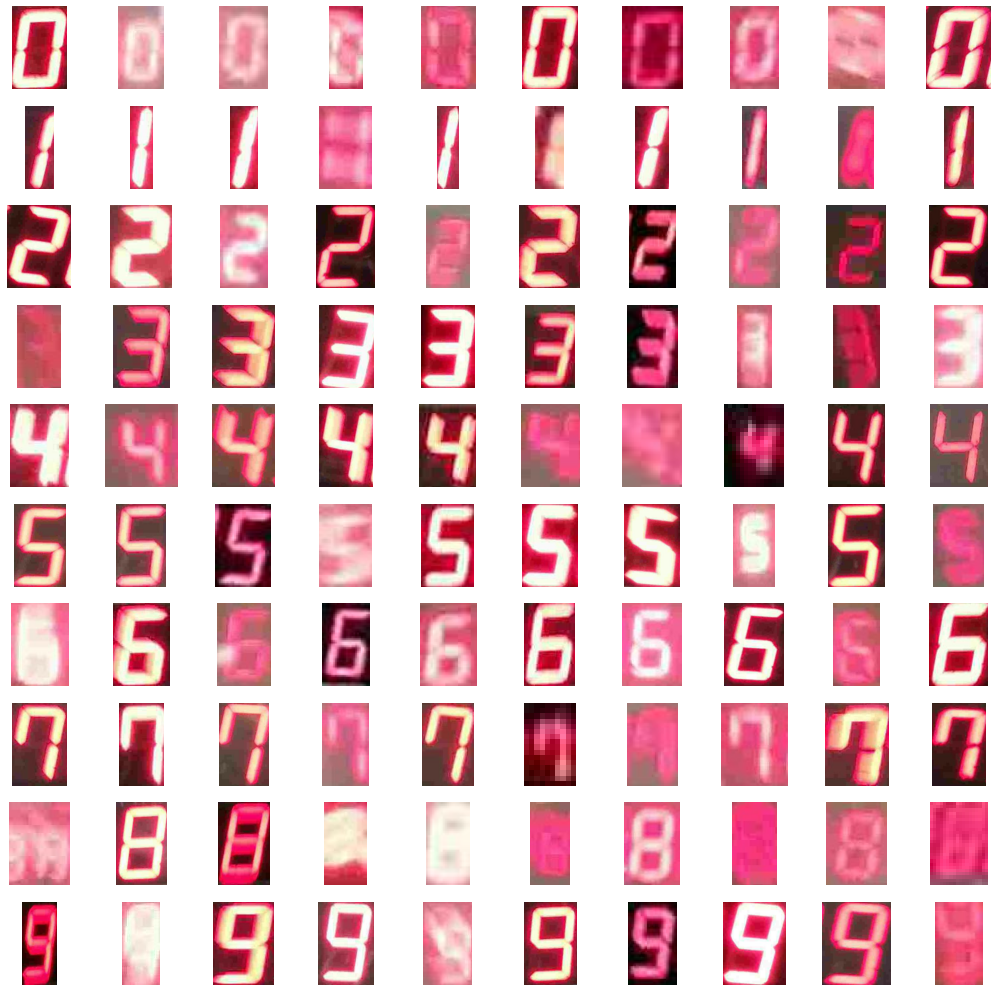

In [5]:
plt.figure(figsize=(18,18))
grid = gridspec.GridSpec(10,10)

# 이미지 출력
for idx1, num in enumerate(range(10)):    
    img_paths = train_df["img_path"][train_df["img_label"]==num][:10].values
    for idx2, img in enumerate(img_paths):
        image = cv2.imread(img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax = plt.subplot(grid[idx1*10+idx2])
        ax.imshow(image)
        plt.axis("off")

## 데이터 셋

In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((train_df["img_path"].values, train_df["img_label"].values) )
valid_ds = tf.data.Dataset.from_tensor_slices((valid_df["img_path"].values, valid_df["img_label"].values))
test_ds = tf.data.Dataset.from_tensor_slices((test_df["img_path"].values, test_df["img_label"].values))
train_count = len(train_ds)
valid_count = len(valid_ds)

## Help Function

In [7]:
def get_label(label):
    one_hot = label == class_names
    return tf.argmax(one_hot)

In [8]:
def decode_img(img):
    img = tf.io.decode_jpeg(img, channels=3)
    return tf.image.resize(img, [size, size])

In [9]:
def process_path(file_path, img_label):
    label = get_label(img_label)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [10]:
def configure_for_performance(ds):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=train_count)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds
def configure_for_performance_test(ds):
    ds = ds.cache()
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

In [11]:
class_names = train_df["img_label"].unique()

# 모델링

In [12]:
def build_eff_model():
    # Top
    x = layers.Input(shape=(size, size, 3))
    
    # aug
    y = layers.RandomRotation(factor=0.02)(x)
    y = layers.RandomZoom(height_factor=0.1, width_factor=0.1)(y)
    
    # base
    y = base_model(y)

    # Rebuild
    dropout_rate = 0.4
    y = layers.GlobalAveragePooling2D(name="avg_pool")(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(dropout_rate)(y)
    y = layers.Dense(128, activation="leaky_relu")(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(dropout_rate)(y)
    y = layers.Dense(10, activation="softmax", name="output")(y)
    
    # compile
    model = models.Model(x, y, name="EfficientNet")
    return model

# 훈련

In [14]:
size = 160
batch_size=32
train_ds = train_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
valid_ds = valid_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = configure_for_performance(train_ds)
valid_ds = configure_for_performance_test(valid_ds)

In [17]:
EPOCHS = 50
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001

optimizer = tfa.optimizers.AdamW(learning_rate=LEARNING_RATE,weight_decay=WEIGHT_DECAY)

es = tf.keras.callbacks.EarlyStopping(monitor="val_acc", patience=10, restore_best_weights=True)

In [18]:
base_model = tf.keras.applications.EfficientNetB0(input_shape=(size,size,3), include_top=False, weights='imagenet')
model = build_eff_model()

model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["acc"],
)

history = model.fit(train_ds,epochs=50,validation_data=valid_ds, callbacks=[es])

Epoch 1/50
681/681 [==============================] - 108s 147ms/step - loss: 0.3140 - acc: 0.9111 - val_loss: 0.0696 - val_acc: 0.9798
Epoch 2/50
681/681 [==============================] - 100s 147ms/step - loss: 0.0906 - acc: 0.9786 - val_loss: 0.0421 - val_acc: 0.9853
Epoch 3/50
681/681 [==============================] - 100s 147ms/step - loss: 0.0722 - acc: 0.9820 - val_loss: 0.0546 - val_acc: 0.9831
Epoch 4/50
681/681 [==============================] - 100s 147ms/step - loss: 0.0719 - acc: 0.9819 - val_loss: 0.0501 - val_acc: 0.9868
Epoch 5/50
681/681 [==============================] - 101s 148ms/step - loss: 0.0645 - acc: 0.9843 - val_loss: 0.0484 - val_acc: 0.9860
Epoch 6/50
681/681 [==============================] - 101s 148ms/step - loss: 0.0682 - acc: 0.9838 - val_loss: 0.0675 - val_acc: 0.9827
Epoch 7/50
681/681 [==============================] - 101s 148ms/step - loss: 0.0619 - acc: 0.9846 - val_loss: 0.0612 - val_acc: 0.9824
Epoch 8/50
681/681 [============================

# 평가

In [20]:
test_ds = tf.data.Dataset.from_tensor_slices((test_df["img_path"].values, test_df["img_label"].values))
test_ds = test_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = configure_for_performance_test(test_ds)
model.evaluate(test_ds)

86/86 [==============================] - 3s 30ms/step - loss: 0.0341 - acc: 0.9901


[0.03408610075712204, 0.9900881052017212]

In [22]:
y_pred = model.predict(test_ds)
y_pred = tf.argmax(y_pred, axis=1).numpy()

86/86 [==============================] - 3s 31ms/step


In [33]:
y_true = np.array([],dtype=int)
for i, j in test_ds:
    y_true = np.append(y_true, j.numpy())

Test Acc	: 0.9900881057268722 


Classfication_report :
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       151
           1       0.99      1.00      0.99       351
           2       1.00      0.99      1.00       919
           3       0.94      0.95      0.94        63
           4       0.99      1.00      1.00       329
           5       0.98      0.97      0.98       131
           6       0.98      1.00      0.99       284
           7       0.99      0.98      0.98       252
           8       0.99      1.00      0.99       144
           9       1.00      1.00      1.00       100

    accuracy                           0.99      2724
   macro avg       0.98      0.98      0.98      2724
weighted avg       0.99      0.99      0.99      2724



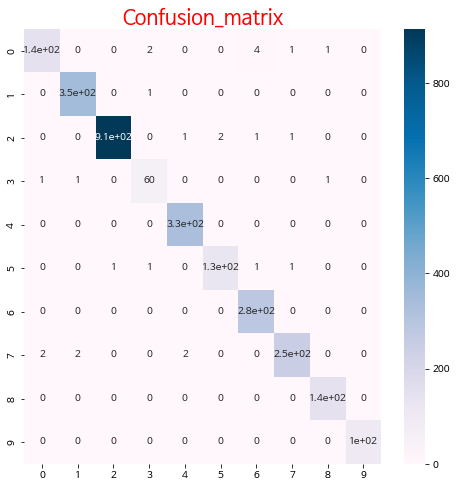

In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
print(colored("Test Acc\t:","red"),accuracy_score(y_true, y_pred),"\n\n")
print(colored("Classfication_report :\n", "red"), classification_report(y_true, y_pred))
plt.figure(figsize=(8,8))
plt.title("Confusion_matrix", fontsize=20, color="red")
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="PuBu");

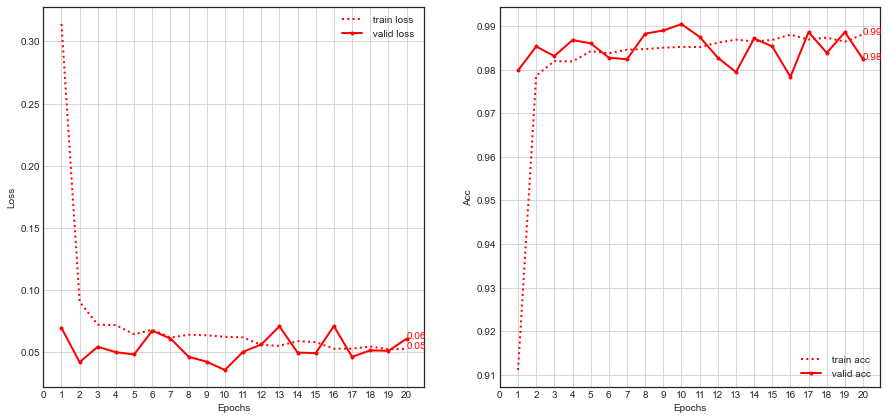

In [40]:
from Myfunc import show_lcurve
show_lcurve([history], [""], size=(15,7), lw=2)